In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max.rows', 500)

In [23]:
def same_as_upper(col:pd.Series)-> pd.Series:
    '''
    Recursively fill NaN rows with the previous value
    '''
    if any(pd.Series(col).isna()):
        col=pd.Series(np.where(col.isna(), col.shift(1), col))
        return same_as_upper(col)
    else:
        return col

In [2]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_brasil.csv')

In [3]:
df = pd.pivot_table(data=df, index=['v2010'], columns=['v2007'])

In [4]:
df.columns=['Homem', 'Mulher']

In [5]:
df.reset_index()

,v2010,Homem,Mulher
0,Amarela,3815.3726,3289.5686
1,Branca,3574.0776,2746.7478
2,Ignorado,3707.5256,3441.5210
3,IndÃ­gena,2333.0181,1707.7792
4,Negro,2170.4851,1771.1996


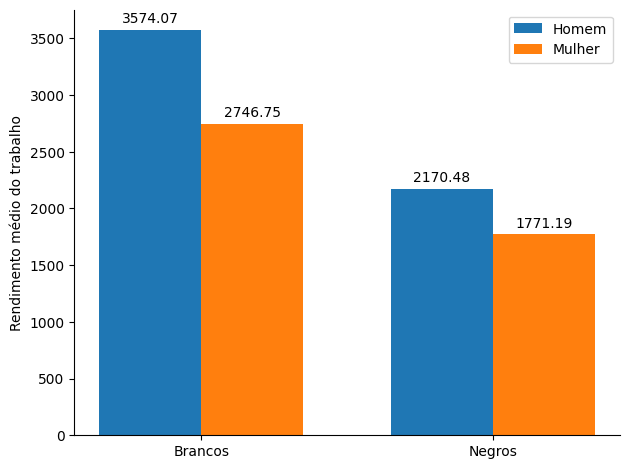

In [6]:
labels = ['Brancos', 'Negros']
men_means = [3574.07, 2170.48]
women_means = [2746.747, 1771.19]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Homem')
rects2 = ax.bar(x + width/2, women_means, width, label='Mulher')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_group.pdf', bbox_inches='tight')

plt.show()

In [7]:
2746.74/3574.07

0.7685188034929366

In [8]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_regions.csv')

df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2010,regiao,rendimento
1,6,Branca,Nordeste,2279.4827
3,8,Branca,Sudeste,3496.0430
6,19,Negro,Nordeste,1601.1753
8,21,Negro,Sudeste,2159.2996


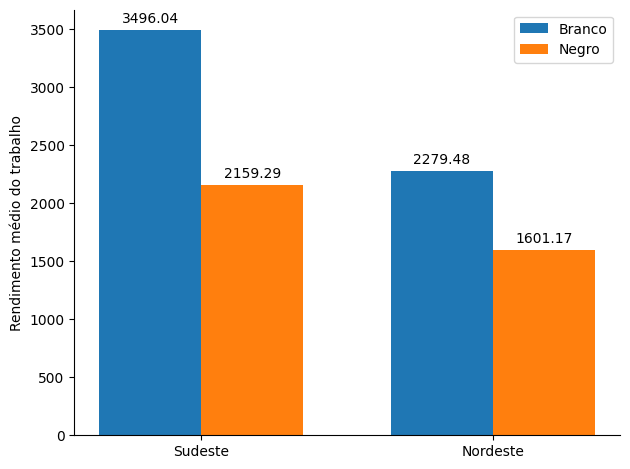

In [9]:
labels = ['Sudeste', 'Nordeste']
white_means = [3496.04,2279.48]
black_means = [2159.29, 1601.17]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco')
rects2 = ax.bar(x + width/2, black_means, width, label='Negro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region.pdf', bbox_inches='tight')

plt.show()

In [10]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_regions.csv')

df= df[df['v2007']==2]
df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2007,v2010,regiao,rendimento
1,16,2,Branca,Nordeste,2104.5867
3,18,2,Branca,Sudeste,2971.1753
6,42,2,Negro,Nordeste,1499.7889
8,44,2,Negro,Sudeste,1855.9591


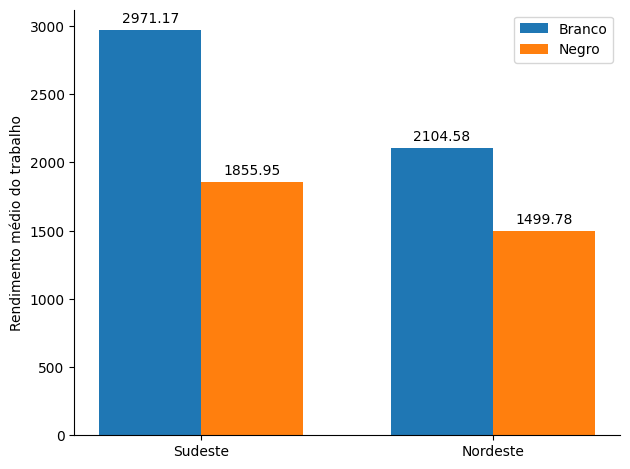

In [11]:
labels = ['Sudeste', 'Nordeste']
white_means = [2971.17,2104.58]
black_means = [1855.95, 1499.78]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco')
rects2 = ax.bar(x + width/2, black_means, width, label='Negro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region_women.pdf', bbox_inches='tight')

plt.show()

In [12]:
1499.78/2430.73

0.6170080593072863

In [13]:
1855.95/3990.77

0.46506062739772025

In [27]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_centis.csv')

df = pd.pivot_table(data=df, index=['inc100'], columns=['v2007','v2010'])
df.columns = ['white_men', 'black_men', 'white_women', 'black_women']
df.head()

,white_men,black_men,white_women,black_women
inc100,,,,
1,280.0,150.0,200.0,120.0
2,400.0,200.0,300.0,200.0
3,500.0,300.0,400.0,210.0
4,600.0,320.0,500.0,300.0
5,700.0,400.0,NaN,NaN


In [28]:
# df.reset_index(inplace=True)

In [29]:
# df.set_index('inc100', inplace=True)

In [30]:
for col in df.columns:
    df[col]=same_as_upper(df[col])

In [32]:
# fig, ax = plt.subplots(figsize=(8,6))

# # plot percentile distribution by group
# ax.plot(df['white_men'], label='Homem Branco')
# ax.plot(df['black_men'], label='Homem Negro')
# ax.plot(df['white_women'], label='Mulher Branca')
# ax.plot(df['black_women'], label='Mulher Negra')

# # x= df['inc100'].to_list()

# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
# ax.set_xlabel('')
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.xticks(np.arange(0, 101, 9))
# ax.set_ylabel('Percentile')
# fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_percentiles.pdf', bbox_inches='tight')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
# plt.show()

In [45]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_decis.csv')

# df = pd.pivot_table(data=df, index=['inc100'], columns=['v2007','v2010'])
# df.columns = ['white_men', 'black_men', 'white_women', 'black_women']

In [46]:
df

,inc100,rendimento
0,1,786.98846
1,2,1211.99190
2,3,1340.57510
3,4,1568.09400
4,5,1919.33790
5,6,2251.66500
6,7,2749.63090
7,8,3675.29050
8,9,5170.32860
9,10,13139.56400


In [44]:
for col in df.columns:
    df[col]=same_as_upper(df[col])

In [42]:
df

rendimento                                                          \
v2007           1                                              2            
v2010     Amarela    Branca Ignorado IndÃ­gena    Negro  Amarela   Branca   
inc100                                                                      
1          1190.0    1200.0    800.0    1212.0   1200.0    606.0   1212.0   
2          1212.0    1212.0   1212.0    1212.0   1212.0   1211.0   1212.0   
3          1300.0    1450.0   1900.0    1212.0   1212.0   1212.0   1450.0   
4          1500.0    1700.0   2500.0    1500.0   1450.0   1270.0   1600.0   
5          1900.0    2000.0   3000.0    1600.0   1624.0   1500.0   2000.0   
6          2200.0    2400.0   7000.0    2000.0   2000.0   1800.0   2500.0   
7          2500.0    3000.0  10000.0    2500.0   2500.0   2300.0   3000.0   
8          3500.0    4000.0  12000.0    3600.0   3500.0   3500.0   5000.0   
9          7000.0    6000.0  12000.0   30000.0  55000.0   6000.0  70000.0   
10        35000.0  150000.0      NaN       NaN      NaN  25000.0      NaN   

                                    
v2007                               
v2010  Ignorado IndÃ­gena    Negro  
inc100                              
1         900.0     900.0    900.0  
2        1200.0    1212.0   1212.0  
3        1300.0    1212.0   1212.0  
4        1400.0    1212.0   1212.0  
5        1500.0    1300.0   1400.0  
6        2500.0    1500.0   1600.0  
7        2700.0    2000.0   2000.0  
8        3000.0    2700.0   3000.0  
9       15000.0   15000.0  50000.0  
10      17000.0       NaN      NaN

In [35]:
df[[df.index[k] in [1,5,9,10] for k in range(len(df))]]

,white_men,black_men,white_women,black_women
inc100,,,,
1,1200.0,1200.0,1212.0,900.0
5,2000.0,1624.0,2000.0,1400.0
9,6000.0,55000.0,70000.0,50000.0
10,150000.0,NaN,NaN,NaN
